In [1]:
!pip install -U -q PyDrive
import pandas as pd
import numpy as np
import os

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':'14S7DQWYPpvtwzqlkwt69AoHtCrHn0_lU'})
downloaded.GetContentFile("Log_Problem.csv",  mimetype='csv')
prblm = pd.read_csv('Log_Problem.csv')
downloaded = drive.CreateFile({'id':'1Szg3o8AAs0isPxaNnY7JbppmuIRkRtEK'})
downloaded.GetContentFile("Info_UserData.csv",  mimetype='csv')
usr = pd.read_csv('Info_UserData.csv')
downloaded = drive.CreateFile({'id':'12uoBoMtIGjYW2ivOmn4N19sTYgkZbffe'})
downloaded.GetContentFile("Info_Content.csv",  mimetype='csv')
cntnt = pd.read_csv('Info_Content.csv')

In [ ]:
prblm.info
prblm.dtypes
prblm.head()
prblm.duplicated().sum()

In [ ]:
usr.info
usr.dtypes
usr.head()
usr.duplicated().sum()

In [ ]:
cntnt.info
cntnt.dtypes
cntnt.head()
cntnt.duplicated().sum()

In [24]:
usr.isnull().sum() #39853 из 72758
usr = usr.dropna()

In [ ]:
prblm.isnull().sum() #14436018 из 16217311 по двум переменным
prblm.pop("is_downgrade")
prblm.pop("is_upgrade")

In [105]:
cntnt.isnull().sum()

ucid                   0
content_pretty_name    0
content_kind           0
difficulty             0
subject                0
learning_stage         0
level1_id              0
level2_id              0
level3_id              0
level4_id              0
dtype: int64

In [107]:
usrid = usr['uuid']
usridch = usrid.sample(n=3638, replace = False)

In [108]:
prblmch = prblm.loc[prblm['uuid'].isin(usridch)]
usrch = usr.loc[usr['uuid'].isin(usridch)]

In [ ]:
prblmch.info

In [ ]:
usrch.info

In [ ]:
prblmch['is_correct'] = (-prblmch['is_correct']).astype(np.int8) #0=True 1=False
prblmch['is_hint_used'] = (-prblmch['is_hint_used']).astype(np.int8)

In [ ]:
usrch['is_self_coach'] = (-usrch['is_self_coach']).astype(np.int8)

In [ ]:
usrch["gender"].value_counts()

In [ ]:
usrch["gender"] = usrch["gender"].astype('category')
usrch["gender"] = usrch["gender"].cat.codes
usrch.head() # 0 = female 1 = male 2 = unspecified

In [ ]:
usrch["user_city"].value_counts()

In [135]:
usrch["user_city"] = usrch["user_city"].astype('category')
usrch["user_city"] = usrch["user_city"].cat.codes
usrch.head() # 0 = female 1 = male 2 = unspecified

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
6,ADL8ZENEcGUW3bCQg4t8gA0tJR9R6H5OYwr+TCPb5oY=,1,7503,0,2019-01-24,2,5,1,-1,0,1,0
16,IfhmdYFkNYPn0MUQ+U+RxlfPniGnvgEgxJtyRBU+B+U=,1,234192,45,2019-01-24,4,15,1,0,24,0,0
21,KcO76LGANyFPrli+kni6J6rES6OSJf5yRjlAeVh9i+M=,1,168196,13,2019-01-24,4,10,0,-1,14,0,2
55,01ORkfL5AfqsUp6Ze8nONFr2EMvr620Nz9t1e29Ol/Y=,0,122754,12,2019-01-24,7,5,0,-1,0,0,0
70,cVG2axPTSLMGBt7yWKy+gv3nzaoJarnjbQb3PgInGPI=,2,41527,19,2019-01-24,8,5,0,-1,0,0,0


tp - 15; tc - 13; ntpc - 10; ty - 17; kh - 5; tn - 14; ptc - 12; chc - 0; ylc - 18; hc - 2; cy - 1; ntct - 9; hlc - 3; ilc - 4; ml - 8; ttct - 16; km - 7; kl - 6; phc - 11

In [117]:
prblmcid = prblmch['ucid']
cntntch = cntnt.loc[cntnt['ucid'].isin(prblmcid)]
cntntch.shape # ушло 5 обозначений проблем
cntntch.head()

(1320, 10)

In [ ]:
cntntch["content_pretty_name"].value_counts()

In [ ]:
cntntch["content_kind"].value_counts() # all Exercise
cntntch.pop("content_kind")

In [ ]:
cntntch["difficulty"].value_counts()

In [ ]:
cntntch["difficulty"] = cntntch["difficulty"].astype('category')
cntntch["difficulty"] = cntntch["difficulty"].cat.codes
# 0 = easy 1 = normal 2 = hard 3 = unset

In [ ]:
cntntch["subject"].value_counts() # only math
cntntch.pop("subject")

In [ ]:
cntntch["learning_stage"].value_counts()

In [ ]:
cntntch["learning_stage"] = cntntch["learning_stage"].astype('category')
cntntch["learning_stage"] = cntntch["learning_stage"].cat.codes
# 0 = elementary 1 = junior 2 = senior

Хэшированный идентификатор уровня 1 этого контента. Уровни формируют древовидную иерархическую структуру содержания в Junyi Academy. Текущая версия набора данных имеет четыре уровня в иерархии.

In [ ]:
cntntch["level1_id"].value_counts() # одно значение
cntntch["level2_id"].value_counts()
cntntch["level3_id"].value_counts()
cntntch["level4_id"].value_counts()

In [127]:
cntntname = cntntch["content_pretty_name"]

In [128]:
from google.colab import files
cntntname.to_csv('cntntname.csv') 
files.download('cntntname.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [129]:
downloaded = drive.CreateFile({'id':'13uyAxaXrZRLFPd-gWTUGcy-HQx0BZHwD'})
downloaded.GetContentFile("cntntnametrnsl.csv",  mimetype='csv')
ctrnsl = pd.read_csv('cntntnametrnsl.csv')

In [130]:
cntch = pd.merge(cntntch,ctrnsl,on="content_pretty_name",how="outer")
cntch.pop("content_pretty_name")

0       【基礎】怎樣解題：數量關係
1          【基礎】和差問題 1
2          【基礎】雞兔問題 1
3          【基礎】年齡問題 1
4            【基礎】追趕問題
            ...      
1343       【進階】圓內角的應用
1344       【進階】圓外角的應用
1345         【一般】分組問題
1346        【一般】解的合理性
1347          時間的基本概念
Name: content_pretty_name, Length: 1348, dtype: object

In [136]:
usrch.head()

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
6,ADL8ZENEcGUW3bCQg4t8gA0tJR9R6H5OYwr+TCPb5oY=,1,7503,0,2019-01-24,2,5,1,-1,0,1,0
16,IfhmdYFkNYPn0MUQ+U+RxlfPniGnvgEgxJtyRBU+B+U=,1,234192,45,2019-01-24,4,15,1,0,24,0,0
21,KcO76LGANyFPrli+kni6J6rES6OSJf5yRjlAeVh9i+M=,1,168196,13,2019-01-24,4,10,0,-1,14,0,2
55,01ORkfL5AfqsUp6Ze8nONFr2EMvr620Nz9t1e29Ol/Y=,0,122754,12,2019-01-24,7,5,0,-1,0,0,0
70,cVG2axPTSLMGBt7yWKy+gv3nzaoJarnjbQb3PgInGPI=,2,41527,19,2019-01-24,8,5,0,-1,0,0,0


In [138]:
import matplotlib
import matplotlib.pyplot as plt

(array([8.560e+02, 0.000e+00, 0.000e+00, 2.058e+03, 0.000e+00, 0.000e+00,
        4.630e+02, 0.000e+00, 0.000e+00, 1.510e+02, 0.000e+00, 0.000e+00,
        4.300e+01, 0.000e+00, 0.000e+00, 2.200e+01, 0.000e+00, 0.000e+00,
        1.300e+01, 0.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0.        ,  0.33333333,  0.66666667,  1.        ,  1.33333333,
         1.66666667,  2.        ,  2.33333333,  2.66666667,  3.        ,
         3.33333333,  3.66666667,  4.        ,  4.33333333,  4.66666667,
         5.        ,  5.33333333,  5.66666667,  6.        ,  6.33333333,
         6.66666667,  7.        ,  7.33333333,  7.66666667,  8.        ,
         8.33333333,  8.66666667,  9.        ,  9.33333333,  9.66666667,
        10.        ]),
 <a list of 30 Patch objects>)

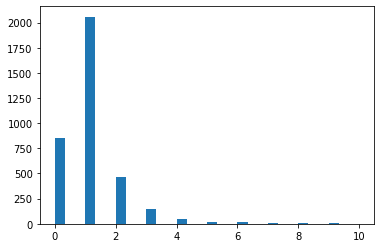

In [169]:
plt.hist(usrch['has_teacher_cnt'], bins=30, stacked=True, range=(0, 10))

(array([3.524e+03, 0.000e+00, 0.000e+00, 4.000e+01, 0.000e+00, 0.000e+00,
        1.600e+01, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00, 0.000e+00,
        7.000e+00, 0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 4.000e+00]),
 array([ 0.        ,  0.33333333,  0.66666667,  1.        ,  1.33333333,
         1.66666667,  2.        ,  2.33333333,  2.66666667,  3.        ,
         3.33333333,  3.66666667,  4.        ,  4.33333333,  4.66666667,
         5.        ,  5.33333333,  5.66666667,  6.        ,  6.33333333,
         6.66666667,  7.        ,  7.33333333,  7.66666667,  8.        ,
         8.33333333,  8.66666667,  9.        ,  9.33333333,  9.66666667,
        10.        ]),
 <a list of 30 Patch objects>)

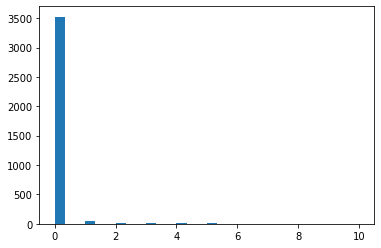

In [168]:
plt.hist(usrch['has_student_cnt'], bins=30, stacked=True, range=(0, 10)) 

(array([1119.,    0.,    0., 1779.,    0.,    0.,  435.,    0.,    0.,
         156.,    0.,    0.,   55.,    0.,    0.,   30.,    0.,    0.,
          16.,    0.,    0.,   12.,    0.,    0.,    5.,    0.,    0.,
           4.,    0.,    4.]),
 array([ 0.        ,  0.33333333,  0.66666667,  1.        ,  1.33333333,
         1.66666667,  2.        ,  2.33333333,  2.66666667,  3.        ,
         3.33333333,  3.66666667,  4.        ,  4.33333333,  4.66666667,
         5.        ,  5.33333333,  5.66666667,  6.        ,  6.33333333,
         6.66666667,  7.        ,  7.33333333,  7.66666667,  8.        ,
         8.33333333,  8.66666667,  9.        ,  9.33333333,  9.66666667,
        10.        ]),
 <a list of 30 Patch objects>)

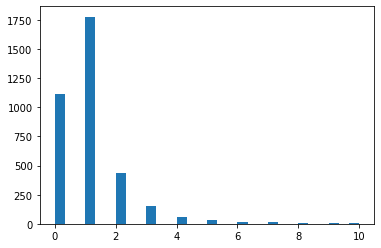

In [170]:
plt.hist(usrch['belongs_to_class_cnt'], bins=30, stacked=True, range=(0, 10)) 

(array([3.417e+03, 0.000e+00, 0.000e+00, 1.740e+02, 0.000e+00, 0.000e+00,
        3.400e+01, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0.        ,  0.33333333,  0.66666667,  1.        ,  1.33333333,
         1.66666667,  2.        ,  2.33333333,  2.66666667,  3.        ,
         3.33333333,  3.66666667,  4.        ,  4.33333333,  4.66666667,
         5.        ,  5.33333333,  5.66666667,  6.        ,  6.33333333,
         6.66666667,  7.        ,  7.33333333,  7.66666667,  8.        ,
         8.33333333,  8.66666667,  9.        ,  9.33333333,  9.66666667,
        10.        ]),
 <a list of 30 Patch objects>)

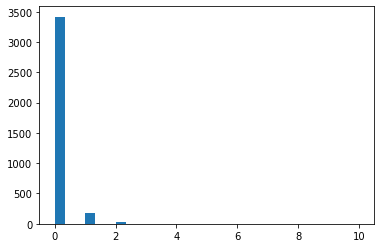

In [171]:
plt.hist(usrch['has_class_cnt'], bins=30, stacked=True, range=(0, 10))